<a href="https://colab.research.google.com/github/savitaChari/W207-Final-Project-Group3_Section6/blob/main/EDA/W207_Final_Project_EDA_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# W207 final project (Section:6 )(Group:3)
# Title: Forest Cover Type Prediction
### Members: Savita Chari, Tymon Silva, Blake Bormes, Andrew Beckerman
### Data Source: https://www.kaggle.com/c/forest-cover-type-prediction/data

In [17]:
import pandas as pd
import sklearn as skl
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pyplt
pd.__version__

'1.3.5'

There are two datasets train.csv and test.csv

In [18]:
# Train Dataset
data = pd.read_csv("covtype.csv")
print("Train Dataset Shape:",data.shape)

Train Dataset Shape: (581012, 55)


In [19]:
# Test Dataset
predict_data = pd.read_csv("test.csv" , header = None)
print("Test Dataset Shape:",predict_data.shape)

Test Dataset Shape: (15121, 56)


In [20]:
#Check for Null Values in training DataSet
print("Number of Null Values in training Dataset:", (data.isnull()==True).sum().sum())

Number of Null Values in training Dataset: 0


In [21]:
#Check for Null Values in test DataSet
print("Number of Null Values in test Dataset:", (predict_data.isnull()==True).sum().sum())

Number of Null Values in test Dataset: 0


#### Observation:
1. The Train Dataset has 581,012 Rows and 56 Columns
2. The Test Dataset has 15,120 rows and 56 Columns.
3. There is no null values found in Test dataset and 44 null values in the Train dataset.

In [22]:
# remove null values from the train dataset
t_data = data[data.notnull()]
print(t_data.head())
# check all null values removed and print shape
print("Number of Null Values in training Dataset:", (t_data.isnull()==True).sum().sum())
print("Train Dataset Shape:",t_data.shape)

   Elevation  Aspect  Slope  ...  Soil_Type39  Soil_Type40  Cover_Type
0       2596      51      3  ...            0            0           5
1       2590      56      2  ...            0            0           5
2       2804     139      9  ...            0            0           2
3       2785     155     18  ...            0            0           2
4       2595      45      2  ...            0            0           5

[5 rows x 55 columns]
Number of Null Values in training Dataset: 0
Train Dataset Shape: (581012, 55)


### ==================  Data Split =============================
We train dataset will be split into train, dev, & test sub datasets. 
The data will be randomized before performing the split. 


##### train_dataset : 98% 
##### dev_dataset   : 2%  
##### Total Rows   : 581012 
#### We will use the train_dataset for the following EDA.

In [23]:
t_data.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [24]:
# Rename Some of the Long Column Names
t_data = t_data.rename(columns={'Horizontal_Distance_To_Hydrology': 'Hdist_to_hydro', 
                                    'Vertical_Distance_To_Hydrology': 'Vdist_to_hydro',
                                    'Horizontal_Distance_To_Roadways': 'Hdist_to_road',
                                    'Horizontal_Distance_To_Fire_Points': 'Hdist_to_FirePt',
                                    'Wilderness_Area1':'Wilderness1',
                                    'Wilderness_Area2':'Wilderness2',
                                    'Wilderness_Area3':'Wilderness3',
                                    'Wilderness_Area4':'Wilderness4'
                                    })


In [25]:
col_list = t_data.columns

In [26]:

X = (t_data[col_list])
Y = t_data["Cover_Type"]
shuffle = np.random.permutation(np.arange(X.shape[0]))
train_split_share = 98 #percentage share of data in train data-set
num_of_train_rows = int(data.shape[0] * train_split_share/100)
print("Rows in train dataset:",num_of_train_rows )
print("Rows in dev dataset  :",t_data.shape[0] - num_of_train_rows )

X, Y = X.iloc[shuffle], Y.iloc[shuffle]
df_train = t_data.iloc[shuffle,:].iloc[:num_of_train_rows , :]
print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
train_data, train_labels = X[:num_of_train_rows], Y[:num_of_train_rows] # 78% or 11794 rows
dev_data, dev_labels = X[num_of_train_rows:], Y[num_of_train_rows:] # 7% or 1058 rows
print("\ntrain_data Shape  : ", train_data.shape, "\t train_labels     : ", train_labels.shape)
print("dev_data Shape    : ", dev_data.shape, "\t dev_labels shape : ", dev_labels.shape)


Rows in train dataset: 569391
Rows in dev dataset  : 11621
data shape:  (581012, 55)
label shape: (581012,)

train_data Shape  :  (569391, 55) 	 train_labels     :  (569391,)
dev_data Shape    :  (11621, 55) 	 dev_labels shape :  (11621,)


In [27]:
#remove rows if it only contains zeros or NaN
df_train = df_train[(data.T != 0).any()]
df_train.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(569391, 55)

In [28]:
print("Remaining number of Null Values in training Dataset after removing rows with only null values:", (df_train.isnull()==True).sum().sum())

Remaining number of Null Values in training Dataset after removing rows with only null values: 0


In [29]:
display(df_train.describe())

,Elevation,Aspect,Slope,Hdist_to_hydro,Vdist_to_hydro,Hdist_to_road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Hdist_to_FirePt,Wilderness1,Wilderness2,Wilderness3,Wilderness4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000,569391.000000
mean,2959.323396,155.703841,14.103407,269.373471,46.415748,2350.231586,212.136502,223.319812,142.540871,1980.302017,0.448927,0.051444,0.436029,0.063600,0.005211,0.012952,0.008307,0.021318,0.002745,0.011333,0.000183,0.000302,0.001967,0.056164,0.021379,0.051632,0.030029,0.001029,0.000005,0.004886,0.005885,0.003270,0.006913,0.015938,0.001447,0.057493,0.099394,0.036558,0.000820,0.004464,0.001876,0.001633,0.198321,0.052003,0.044144,0.090446,0.077692,0.002761,0.003247,0.000204,0.000509,0.026727,0.023750,0.015063,2.051213
std,279.969423,111.929781,7.489144,212.501678,58.306892,1559.044436,26.771201,19.770408,38.276073,1324.264051,0.497385,0.220903,0.495891,0.244038,0.071998,0.113069,0.090764,0.144441,0.052321,0.105852,0.013514,0.017378,0.044307,0.230237,0.144644,0.221284,0.170666,0.032064,0.002295,0.069728,0.076489,0.057092,0.082855,0.125236,0.038014,0.232782,0.299190,0.187675,0.028627,0.066667,0.043269,0.040381,0.398735,0.222033,0.205414,0.286820,0.267686,0.052471,0.056893,0.014272,0.022562,0.161284,0.152269,0.121806,1.396095
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1998.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [30]:
df_train.head()

,Elevation,Aspect,Slope,Hdist_to_hydro,Vdist_to_hydro,Hdist_to_road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Hdist_to_FirePt,Wilderness1,Wilderness2,Wilderness3,Wilderness4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
540912,3251,118,30,446,150,3365,254,198,49,470,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
67121,3218,144,15,127,13,3132,240,236,120,4790,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
334722,3191,347,13,134,12,4533,195,218,162,1668,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
515405,3191,173,14,297,17,564,228,246,147,2624,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
279569,2224,343,28,108,35,973,154,186,164,1350,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [31]:
# Soil_Type
# There are 40 soil_type fields representing each of the following types of soil
# These fields are binary 
"""
The soil types are:
1 Cathedral family - Rock outcrop complex, extremely stony.
2 Vanet - Ratake families complex, very stony.
3 Haploborolis - Rock outcrop complex, rubbly.
4 Ratake family - Rock outcrop complex, rubbly.
5 Vanet family - Rock outcrop complex complex, rubbly.
6 Vanet - Wetmore families - Rock outcrop complex, stony.
7 Gothic family.
8 Supervisor - Limber families complex.
9 Troutville family, very stony.
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
11 Bullwark - Catamount families - Rock land complex, rubbly.
12 Legault family - Rock land complex, stony.
13 Catamount family - Rock land - Bullwark family complex, rubbly.
14 Pachic Argiborolis - Aquolis complex.
15 unspecified in the USFS Soil and ELU Survey.
16 Cryaquolis - Cryoborolis complex.
17 Gateview family - Cryaquolis complex.
18 Rogert family, very stony.
19 Typic Cryaquolis - Borohemists complex.
20 Typic Cryaquepts - Typic Cryaquolls complex.
21 Typic Cryaquolls - Leighcan family, till substratum complex.
22 Leighcan family, till substratum, extremely bouldery.
23 Leighcan family, till substratum - Typic Cryaquolls complex.
24 Leighcan family, extremely stony.
25 Leighcan family, warm, extremely stony.
26 Granile - Catamount families complex, very stony.
27 Leighcan family, warm - Rock outcrop complex, extremely stony.
28 Leighcan family - Rock outcrop complex, extremely stony.
29 Como - Legault families complex, extremely stony.
30 Como family - Rock land - Legault family complex, extremely stony.
31 Leighcan - Catamount families complex, extremely stony.
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34 Cryorthents - Rock land complex, extremely stony.
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
40 Moran family - Cryorthents - Rock land complex, extremely stony.
"""
# unique values in a soil field
print(df_train.Soil_Type1.unique(), df_train.Soil_Type2.unique(), df_train.Soil_Type3.unique(), df_train.Soil_Type4.unique(), df_train.Soil_Type5.unique(),df_train.Soil_Type6.unique(),
df_train.Soil_Type7.unique(),
df_train.Soil_Type8.unique(),
df_train.Soil_Type9.unique(),
df_train.Soil_Type10.unique(),
df_train.Soil_Type11.unique(),
df_train.Soil_Type12.unique(),
df_train.Soil_Type13.unique(),
df_train.Soil_Type14.unique(),
df_train.Soil_Type15.unique(),
df_train.Soil_Type16.unique(),
df_train.Soil_Type17.unique(),
df_train.Soil_Type18.unique(),
df_train.Soil_Type19.unique(),
df_train.Soil_Type20.unique(),
df_train.Soil_Type21.unique(),
df_train.Soil_Type22.unique(),
df_train.Soil_Type23.unique(),
df_train.Soil_Type24.unique(),
df_train.Soil_Type25.unique(),
df_train.Soil_Type26.unique(),
df_train.Soil_Type27.unique(),
df_train.Soil_Type28.unique(),
df_train.Soil_Type29.unique(),
df_train.Soil_Type30.unique(),
df_train.Soil_Type31.unique(),
df_train.Soil_Type32.unique(),
df_train.Soil_Type33.unique(),
df_train.Soil_Type34.unique(),
df_train.Soil_Type35.unique(),
df_train.Soil_Type36.unique(),
df_train.Soil_Type37.unique(),
df_train.Soil_Type38.unique(),
df_train.Soil_Type39.unique(),
df_train.Soil_Type40.unique())

[0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [0 1] [1 0] [0 1]


In [32]:
# Forest Cover: Cover_Type
# unique Values in cover_type field (This is tyoes of trees that cover the forest ground)
'''
 This value is 1-7 and indicates
 1 - Spruce/Fir
 2 - Lodgepole Pine
 3 - Ponderosa Pine
 4 - Cottonwood/Willow
 5 - Aspen
 6 - Douglas-fir
 7 - Krummholz
'''
print("unique Cover_Type:",sorted(df_train.Cover_Type.unique()))

unique Cover_Type: [1, 2, 3, 4, 5, 6, 7]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1e6431c90>]],
      dtype=object)

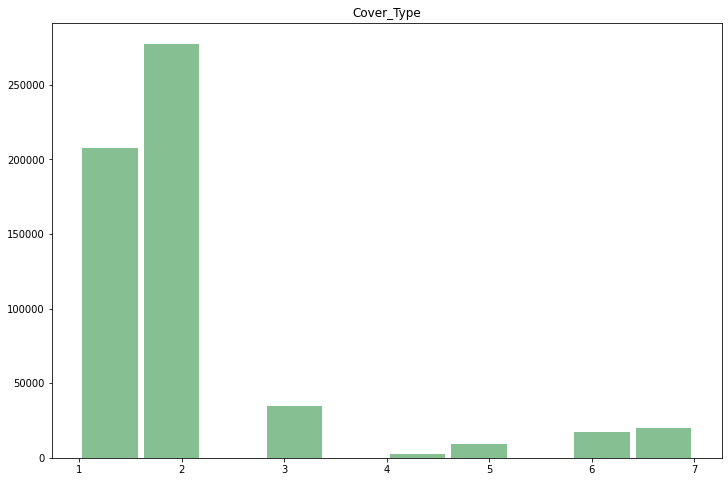

In [33]:
# Distribution of Cover_Type
df_train.hist('Cover_Type', grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1e63e6950>]],
      dtype=object)

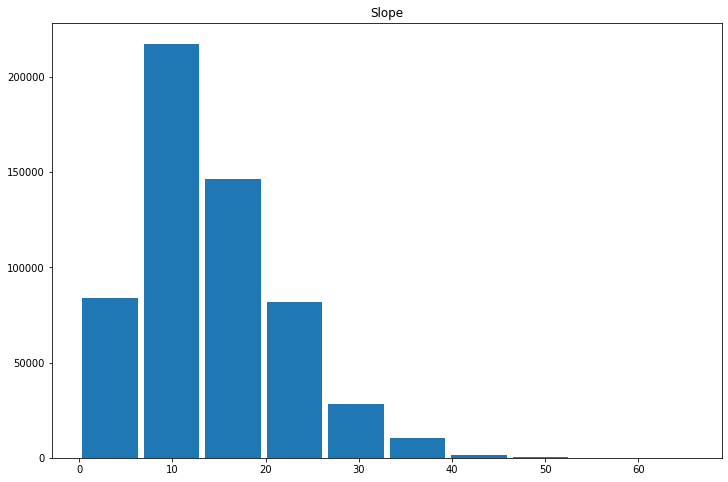

In [34]:
# Distribution of Cover_Type
df_train.hist('Slope', grid=False, figsize=(12,8),  zorder=2, rwidth=0.9)

In [35]:
# Wilderness Area
# There are 4 columns representing wilderness Area
# The Value seems binary
'''
The four columns represent the following: 
1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area
'''
print(df_train.Wilderness1.unique(), df_train.Wilderness2.unique(), df_train.Wilderness3.unique(), df_train.Wilderness4.unique())

[0 1] [0 1] [1 0] [0 1]


### Observation Summary:
There are no text fields.

All fields are continous or binary. 

There are 40 soil fields and that are binary.

There are 4 Wilderness Area fields are binary.

#### The following fields are continuous:

Elevation

Aspect

Slope

Horizontal_Distance_To_Hydrology

Vertical_Distance_To_Hydrology

Horizontal_Distance_To_Roadways

Hillshade_9am

Hillshade_Noon

Hillshade_3pm

Horizontal_Distance_To_Fire_Points

###  outcome: Predict the forest cover type

In [36]:
# Correlation between fields
corr_matrix = df_train.corr(method ='pearson')
corr_matrix

,Elevation,Aspect,Slope,Hdist_to_hydro,Vdist_to_hydro,Hdist_to_road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Hdist_to_FirePt,Wilderness1,Wilderness2,Wilderness3,Wilderness4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,0.015755,-0.242629,0.306150,0.093416,0.365620,0.111992,0.206016,0.059401,0.147997,0.132037,0.238203,0.066296,-0.619445,-0.204658,-0.187609,-0.182435,-0.183301,-0.150505,-0.214847,-0.002262,-0.002975,-0.060797,-0.428791,-0.134233,-0.118913,-0.043893,-0.080873,-0.007226,-0.059570,-0.111182,-0.081784,0.033130,-0.043142,0.017612,0.159191,0.124330,0.053649,0.028850,-0.016751,0.035424,-0.029379,0.074398,-0.026506,0.070578,0.167129,0.070545,0.011733,0.082883,0.021085,0.035312,0.216839,0.193565,0.212573,-0.269886
Aspect,0.015755,1.000000,0.078715,0.017055,0.069972,0.024997,-0.579456,0.336017,0.647108,-0.109353,-0.140075,0.056160,0.074969,0.082318,-0.007838,-0.005731,-0.002648,0.017136,0.008972,0.010495,-0.004988,-0.003065,-0.020939,0.049820,-0.064153,-0.070345,0.054715,0.007448,-0.002687,0.007959,-0.000202,-0.028281,-0.003165,-0.029255,0.033057,0.021610,0.013711,0.017806,-0.003263,-0.010744,0.011439,0.027538,-0.062151,-0.028958,0.002156,0.056189,0.019069,0.010822,-0.022079,0.002285,-0.020292,0.017363,0.008552,-0.005898,0.016757
Slope,-0.242629,0.078715,1.000000,-0.010541,0.275052,-0.215855,-0.327434,-0.526976,-0.175744,-0.185747,-0.234658,-0.036258,0.125756,0.255548,0.107907,-0.018475,0.125571,0.131633,0.072504,0.003706,-0.015822,-0.023046,-0.032735,0.244018,-0.051005,-0.169285,0.192533,0.000127,0.001092,-0.035053,-0.040107,-0.045880,-0.083663,-0.077647,-0.025418,-0.053437,-0.207505,0.082281,0.026253,-0.021520,0.043833,0.067016,-0.083006,0.075988,-0.034527,-0.133429,0.208978,-0.010881,-0.022507,0.002941,0.007889,-0.071939,0.093498,0.025760,0.148334
Hdist_to_hydro,0.306150,0.017055,-0.010541,1.000000,0.606275,0.072076,-0.027047,0.046662,0.052226,0.052123,-0.096931,0.055833,0.121764,-0.100409,-0.035029,-0.011399,-0.041371,-0.049170,-0.009285,-0.012773,0.004759,-0.000830,-0.021947,-0.071779,0.001345,0.014724,-0.001855,-0.038451,-0.002694,-0.067313,-0.071513,-0.013411,-0.043177,-0.077795,-0.040036,-0.051331,-0.132643,0.022132,0.016302,0.013206,0.052787,0.026036,-0.001099,-0.049855,0.073845,0.127230,0.101243,0.070022,-0.005062,0.033478,-0.006865,0.042591,0.032110,0.146993,-0.020426
Vdist_to_hydro,0.093416,0.069972,0.275052,0.606275,1.000000,-0.046386,-0.166322,-0.111102,0.034796,-0.069791,-0.180639,-0.008626,0.146821,0.077633,0.015278,0.009045,0.008471,0.024895,0.026776,0.046565,-0.008528,-0.012768,-0.028413,0.055085,-0.021081,-0.044546,0.083485,-0.024285,-0.001762,-0.050846,-0.054158,-0.031698,-0.055575,-0.076722,-0.026172,-0.075640,-0.180166,0.037098,-0.013185,-0.011328,0.067334,0.071453,-0.075953,-0.011756,0.033800,0.039804,0.167226,0.059951,-0.005970,0.012929,-0.007602,-0.008801,0.043884,0.179101,0.081474
Hdist_to_road,0.365620,0.024997,-0.215855,0.072076,-0.046386,1.000000,0.034600,0.189130,0.105747,0.331519,0.454163,-0.200552,-0.233131,-0.270384,-0.083595,-0.088055,-0.085037,-0.088418,-0.061664,-0.108386,0.020220,0.025478,-0.045732,-0.183019,-0.099283,0.054438,-0.055061,-0.033959,-0.003176,0.017998,-0.051885,-0.051264,0.068470,0.056451,-0.014932,0.046926,-0.006695,-0.032934,-0.034939,0.002535,0.003904,-0.032800,0.306576,0.076868,-0.058687,-0.089080,-0.082907,0.006454,-0.003003,0.007566,0.016255,0.079891,0.033591,0.016234,-0.153580
Hillshade_9am,0.111992,-0.579456,-0.327434,-0.027047,-0.166322,0.034600,1.000000,0.010143,-0.780235,0.132814,0.201461,-0.006370,-0.100697,-0.2

The Pandas documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#applying-multiple-functions-at-once) should be a useful reference.

In [37]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,Elevation,Aspect,Slope,Hdist_to_hydro,Vdist_to_hydro,Hdist_to_road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Hdist_to_FirePt,Wilderness1,Wilderness2,Wilderness3,Wilderness4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,0.015755,-0.242629,0.306150,0.093416,0.365620,0.111992,0.206016,0.059401,0.147997,0.132037,0.238203,0.066296,-0.619445,-0.204658,-0.187609,-0.182435,-0.183301,-0.150505,-0.214847,-0.002262,-0.002975,-0.060797,-0.428791,-0.134233,-0.118913,-0.043893,-0.080873,-0.007226,-0.059570,-0.111182,-0.081784,0.033130,-0.043142,0.017612,0.159191,0.124330,0.053649,0.028850,-0.016751,0.035424,-0.029379,0.074398,-0.026506,0.070578,0.167129,0.070545,0.011733,0.082883,0.021085,0.035312,0.216839,0.193565,0.212573,-0.269886
Aspect,0.015755,1.000000,0.078715,0.017055,0.069972,0.024997,-0.579456,0.336017,0.647108,-0.109353,-0.140075,0.056160,0.074969,0.082318,-0.007838,-0.005731,-0.002648,0.017136,0.008972,0.010495,-0.004988,-0.003065,-0.020939,0.049820,-0.064153,-0.070345,0.054715,0.007448,-0.002687,0.007959,-0.000202,-0.028281,-0.003165,-0.029255,0.033057,0.021610,0.013711,0.017806,-0.003263,-0.010744,0.011439,0.027538,-0.062151,-0.028958,0.002156,0.056189,0.019069,0.010822,-0.022079,0.002285,-0.020292,0.017363,0.008552,-0.005898,0.016757
Slope,-0.242629,0.078715,1.000000,-0.010541,0.275052,-0.215855,-0.327434,-0.526976,-0.175744,-0.185747,-0.234658,-0.036258,0.125756,0.255548,0.107907,-0.018475,0.125571,0.131633,0.072504,0.003706,-0.015822,-0.023046,-0.032735,0.244018,-0.051005,-0.169285,0.192533,0.000127,0.001092,-0.035053,-0.040107,-0.045880,-0.083663,-0.077647,-0.025418,-0.053437,-0.207505,0.082281,0.026253,-0.021520,0.043833,0.067016,-0.083006,0.075988,-0.034527,-0.133429,0.208978,-0.010881,-0.022507,0.002941,0.007889,-0.071939,0.093498,0.025760,0.148334
Hdist_to_hydro,0.306150,0.017055,-0.010541,1.000000,0.606275,0.072076,-0.027047,0.046662,0.052226,0.052123,-0.096931,0.055833,0.121764,-0.100409,-0.035029,-0.011399,-0.041371,-0.049170,-0.009285,-0.012773,0.004759,-0.000830,-0.021947,-0.071779,0.001345,0.014724,-0.001855,-0.038451,-0.002694,-0.067313,-0.071513,-0.013411,-0.043177,-0.077795,-0.040036,-0.051331,-0.132643,0.022132,0.016302,0.013206,0.052787,0.026036,-0.001099,-0.049855,0.073845,0.127230,0.101243,0.070022,-0.005062,0.033478,-0.006865,0.042591,0.032110,0.146993,-0.020426
Vdist_to_hydro,0.093416,0.069972,0.275052,0.606275,1.000000,-0.046386,-0.166322,-0.111102,0.034796,-0.069791,-0.180639,-0.008626,0.146821,0.077633,0.015278,0.009045,0.008471,0.024895,0.026776,0.046565,-0.008528,-0.012768,-0.028413,0.055085,-0.021081,-0.044546,0.083485,-0.024285,-0.001762,-0.050846,-0.054158,-0.031698,-0.055575,-0.076722,-0.026172,-0.075640,-0.180166,0.037098,-0.013185,-0.011328,0.067334,0.071453,-0.075953,-0.011756,0.033800,0.039804,0.167226,0.059951,-0.005970,0.012929,-0.007602,-0.008801,0.043884,0.179101,0.081474
Hdist_to_road,0.365620,0.024997,-0.215855,0.072076,-0.046386,1.000000,0.034600,0.189130,0.105747,0.331519,0.454163,-0.200552,-0.233131,-0.270384,-0.083595,-0.088055,-0.085037,-0.088418,-0.061664,-0.108386,0.020220,0.025478,-0.045732,-0.183019,-0.099283,0.054438,-0.055061,-0.033959,-0.003176,0.017998,-0.051885,-0.051264,0.068470,0.056451,-0.014932,0.046926,-0.006695,-0.032934,-0.034939,0.002535,0.003904,-0.032800,0.306576,0.076868,-0.058687,-0.089080,-0.082907,0.006454,-0.003003,0.007566,0.016255,0.079891,0.033591,0.016234,-0.153580
Hillshade_9am,0.111992,-0.579456,-0.327434,-0.027047,-0.166322,0.034600,1.000000,0.010143,-0.780235,0.132814,0.201461,-0.006370,-0.100697,-0.2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1e4611850>]],
      dtype=object)

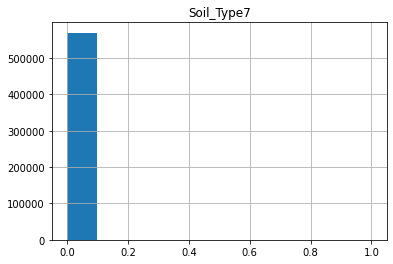

In [38]:
#Closer Look at Field Soil_Type7 that does not show any correlation with other fields
df_train.hist(column='Soil_Type7')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1e442a8d0>]],
      dtype=object)

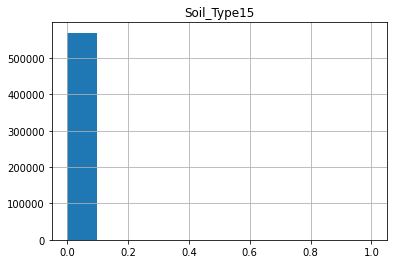

In [39]:
#Closer Look at Field Soil_Type15 that does not show any correlation with other fields
df_train.hist(column='Soil_Type15')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1e42d3810>]],
      dtype=object)

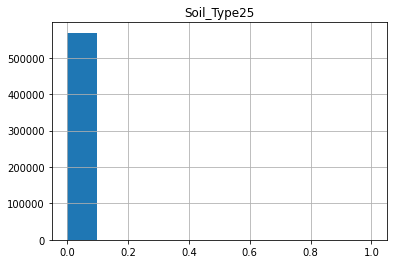

In [40]:
#Closer Look at Field Soil_Type25 that does not show any correlation with other fields
df_train.hist(column='Soil_Type25')

### Observation from correlation matrix
#### Both these observations make sense because all train data had values of 0 for soil type 7, 15, and 25.
##### Soil_Type7, Soil_Type15, and Soil_Type25 can be dropped from the dataset because they have no effect on the behavior of the other columns. 
##### The data set is very large. With an ordinary laptop, it takes very long to process it. We are sampling  1/12th of the dataset to draw pair plot to find correlations between fields.


In [41]:
# remove columns Soil_Type7, Soil_Type15, and Soil_Type25 from all datasets

df_train = df_train.drop(labels = ['Soil_Type7','Soil_Type15','Soil_Type25'], axis = 1)

# resplit train, dev data
train_data, train_labels = X[:num_of_train_rows], Y[:num_of_train_rows] # 78% or 11794 rows
dev_data, dev_labels = X[num_of_train_rows:], Y[num_of_train_rows:] # 7% or 1058 rows
print("\ntrain_data Shape  : ", train_data.shape, "\t train_labels     : ", train_labels.shape)
print("dev_data Shape    : ", dev_data.shape, "\t dev_labels shape : ", dev_labels.shape)




train_data Shape  :  (569391, 55) 	 train_labels     :  (569391,)
dev_data Shape    :  (11621, 55) 	 dev_labels shape :  (11621,)


In [42]:
# Sample 1/12th of dataset
print("Sample Size:",int(num_of_train_rows/15) )
plot_df_train = df_train.sample(n=int(num_of_train_rows))

Sample Size: 37959


In [43]:
# Correlation and Distribution Plot for some of the more closely related fields
sns.set_style("ticks")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sub_df = plot_df_train[['Elevation', 'Aspect', 'Slope','Hdist_to_hydro','Vdist_to_hydro', 'Hdist_to_road','Hdist_to_FirePt' ,
        'Cover_Type' ]]
sns.pairplot(hue="Cover_Type", data=sub_df, palette='RdBu', diag_kws={'alpha':.5})


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fe1fb1230e0> (for post_execute):


KeyboardInterrupt: ignored

Upon first glance, it seems that elevation and forest cover type are highly correlated. Aspect, Horizontal distance to road, and horizontal distance to fires seem to be correlated to the forest cover type as well. The correlation between other variable such as slope, and horizontal and vertical distance to water seems to be rather small.

In [ ]:
# Correlation and Distribution Plot for wilderness and hillshade measures
sns.set_style("ticks")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sub_df = plot_df_train[['Wilderness1', 'Wilderness2', 'Wilderness3','Wilderness4','Hillshade_9am', 'Hillshade_Noon','Hillshade_3pm' ,
        'Cover_Type' ]]
sns.pairplot(hue="Cover_Type", data=sub_df, palette='RdBu', diag_kws={'alpha':.5})

From an initial look, wilderness types don't seem to profoundly impact forest cover types, but do show some correlation. Similarly hillshade for different forest cover types seems to be pretty uniform, but there could be some sort of siginficant impact. Further analysis will need to be done.

### Let's look at a boxplot distribution for our continuous variables to get a better understanding of their distribution, mean, and variance.

In [44]:
train_data.columns

Index(['Elevation', 'Aspect', 'Slope', 'Hdist_to_hydro', 'Vdist_to_hydro',
       'Hdist_to_road', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Hdist_to_FirePt', 'Wilderness1', 'Wilderness2', 'Wilderness3',
       'Wilderness4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4',
       'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9',
       'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13',
       'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17',
       'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21',
       'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
       'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29',
       'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33',
       'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37',
       'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type'],
      dtype='object')

In [ ]:
train_data.boxplot(column= ['Elevation','Hdist_to_hydro'])

In [ ]:
train_data.boxplot(column= ['Hdist_to_road',
       'Hdist_to_FirePt'])

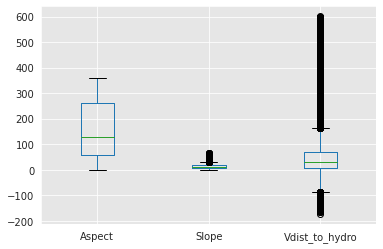

In [45]:
train_data.boxplot(column= ['Aspect', 'Slope',
       'Vdist_to_hydro'])

In [ ]:
train_data.boxplot(column= ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'])

### EDA Insights
#### From our initial data analysis we can expect that some key factors in our classification model could be elevation, aspect, horizontal distance to fires, and horizontal distance to roads. Wilderness types may have little impact when predicting forest cover types, but we could find that certain wilderness types such as types one and four, could have some correlation to determining forest cover type. We expect to see vertical distance to hydro to have little impact in predicting forest cover type. Additionally, from the box plots of our continuous variables we have a good idea of their distributions, means, and variances. The distance measures tend to have high variances. The hillshade values at 9am and Noon seem to have similar distributions, and therefore we could see that hillshade 3pm is a feature that has more predictive power than the other two hillshade measures.